In [1]:
%matplotlib inline
from matplotlib import pyplot
import geopandas as gpd

from weave_units import WeaveUnit
from tile_map import Tiling

#### **LOL** I renamed your file to something more manageable...
and added an ID column (so grab the one in the repo)

Note: this data run was originally 000208 from \data\ag-covid\paper-GWR-OLS

In [2]:
gwr1 = gpd.read_file("../data/001290-results-GWR_fixbw-COVID_cases_per_1000persons__over_both_periods-regen-convent-BlackAsianHispanic-COVID_days-life_expect.gpkg")
gwr1["ID"] = list(range(gwr1.shape[0]))

gwr2 = gpd.read_file("../data/006092-results-GWR_fixbw-COVID_cases_per_1000persons__over_period_1-BlackAsianHispanic.gpkg")
gwr2["ID"] = list(range(gwr2.shape[0]))

# GWR example

<AxesSubplot:>

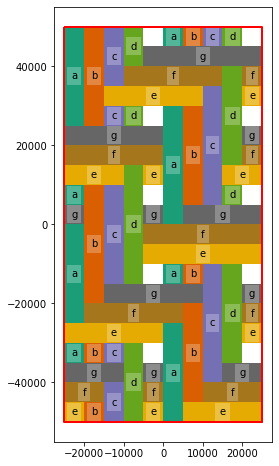

In [3]:
w1 = WeaveUnit(strands = "abcd-|efg-", weave_type = "twill", n = 5,
               aspect = 1, spacing = 5000, crs = gwr1.crs)
w1.plot()

In [4]:
w1_tiling = Tiling(w1, gwr1, id_var = "ID")

In [5]:
w1_map = w1_tiling.get_tiled_map(rotation = 30, prioritise_tiles = True)

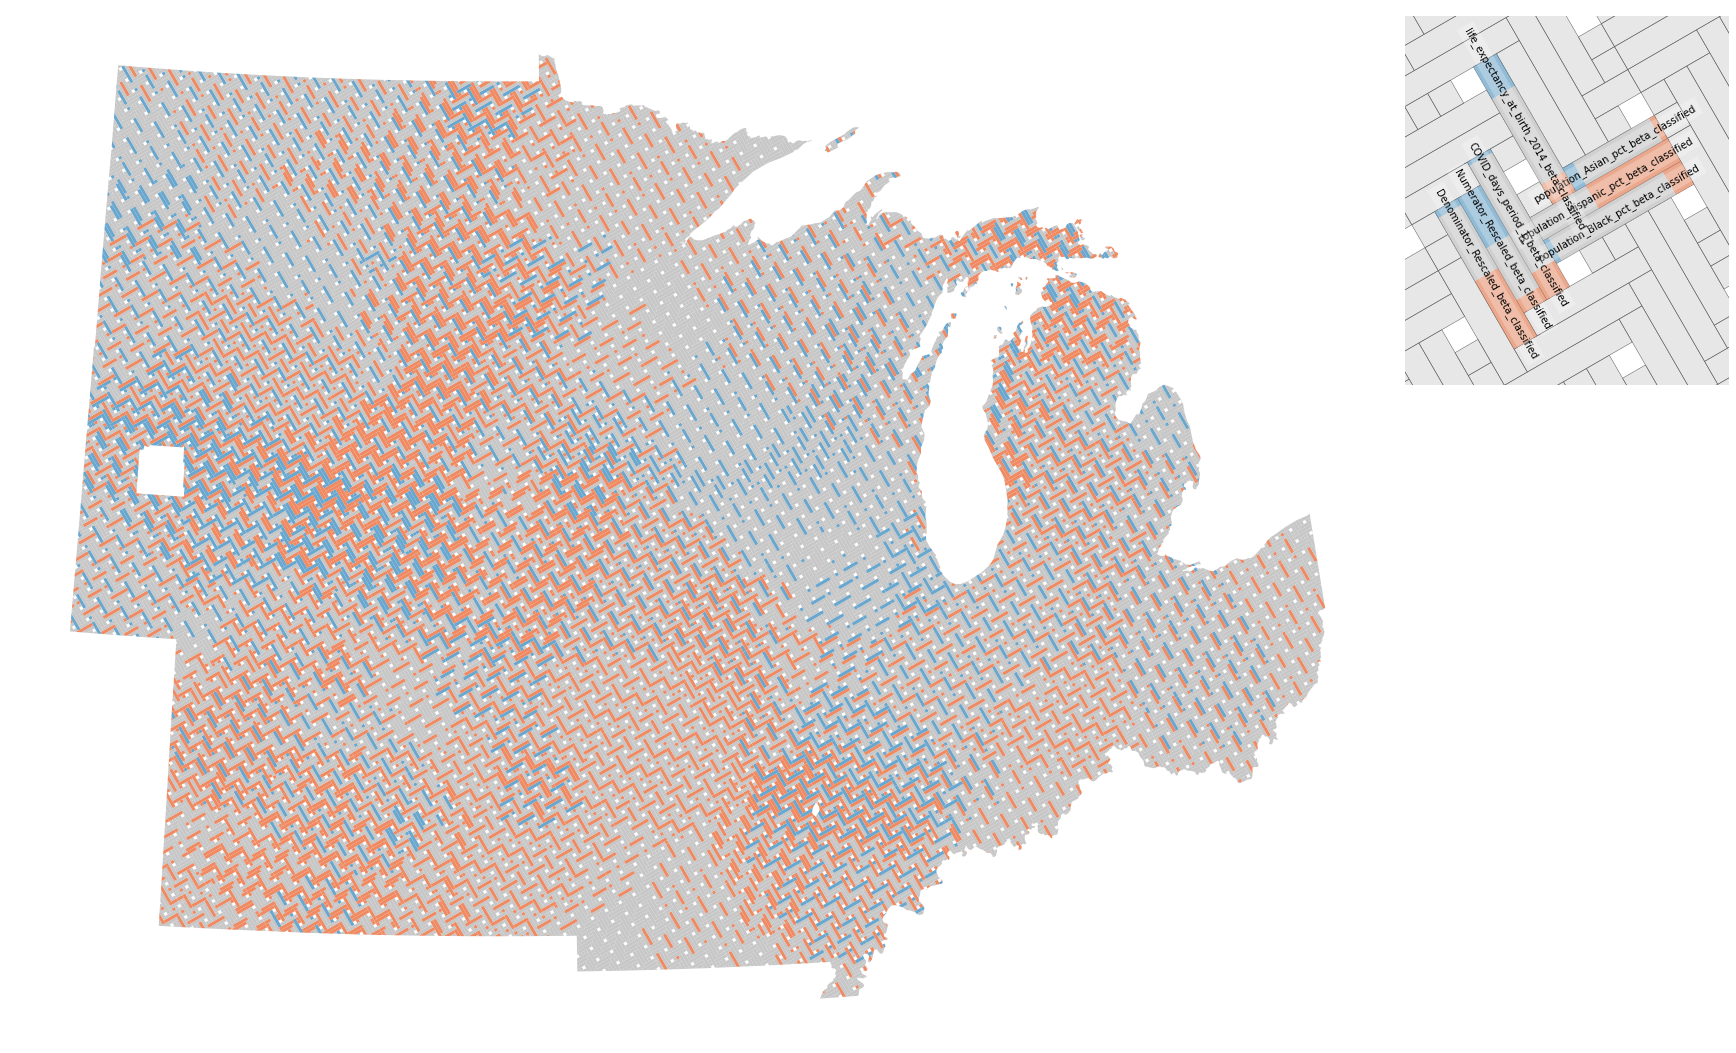

In [6]:
w1_map.variables = dict(zip(list("abcdefg"),
                           ['life_expectancy_at_birth_2014_beta_classified',
                            'Denominator_Rescaled_beta_classified', 'Numerator_Rescaled_beta_classified',
                            'COVID_days_period_1_beta_classified', 'population_Black_pct_beta_classified', 'population_Hispanic_pct_beta_classified', 'population_Asian_pct_beta_classified']))
w1_map.colourmaps = dict(zip(
    w1_map.variables.values(),
    7 * [{'associated with LESS covid': "#69A7CF",
          'not significant': "#C7C7C7",
          'associated with MORE covid': "#EF8A62"}]))
w1_map.dpi = 150
w1_map.figsize = (24, 18)

fig = w1_map.render(legend_zoom = 0.8)
fig.savefig("weave1.pdf")

<AxesSubplot:>

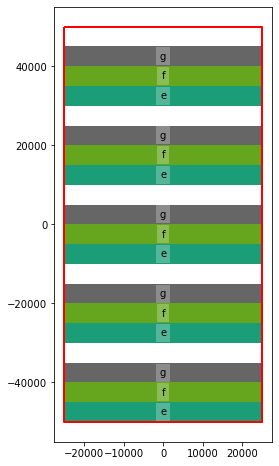

In [7]:
w2 = WeaveUnit(strands = "-----|efg-", weave_type = "twill", n = 5,
               aspect = 1, spacing = 5000, crs = gwr1.crs)
w2.plot()

In [8]:
w2_tiling = Tiling(w2, gwr2, id_var = "ID")

In [9]:
w2_map = w2_tiling.get_tiled_map(rotation = 30, prioritise_tiles = True)

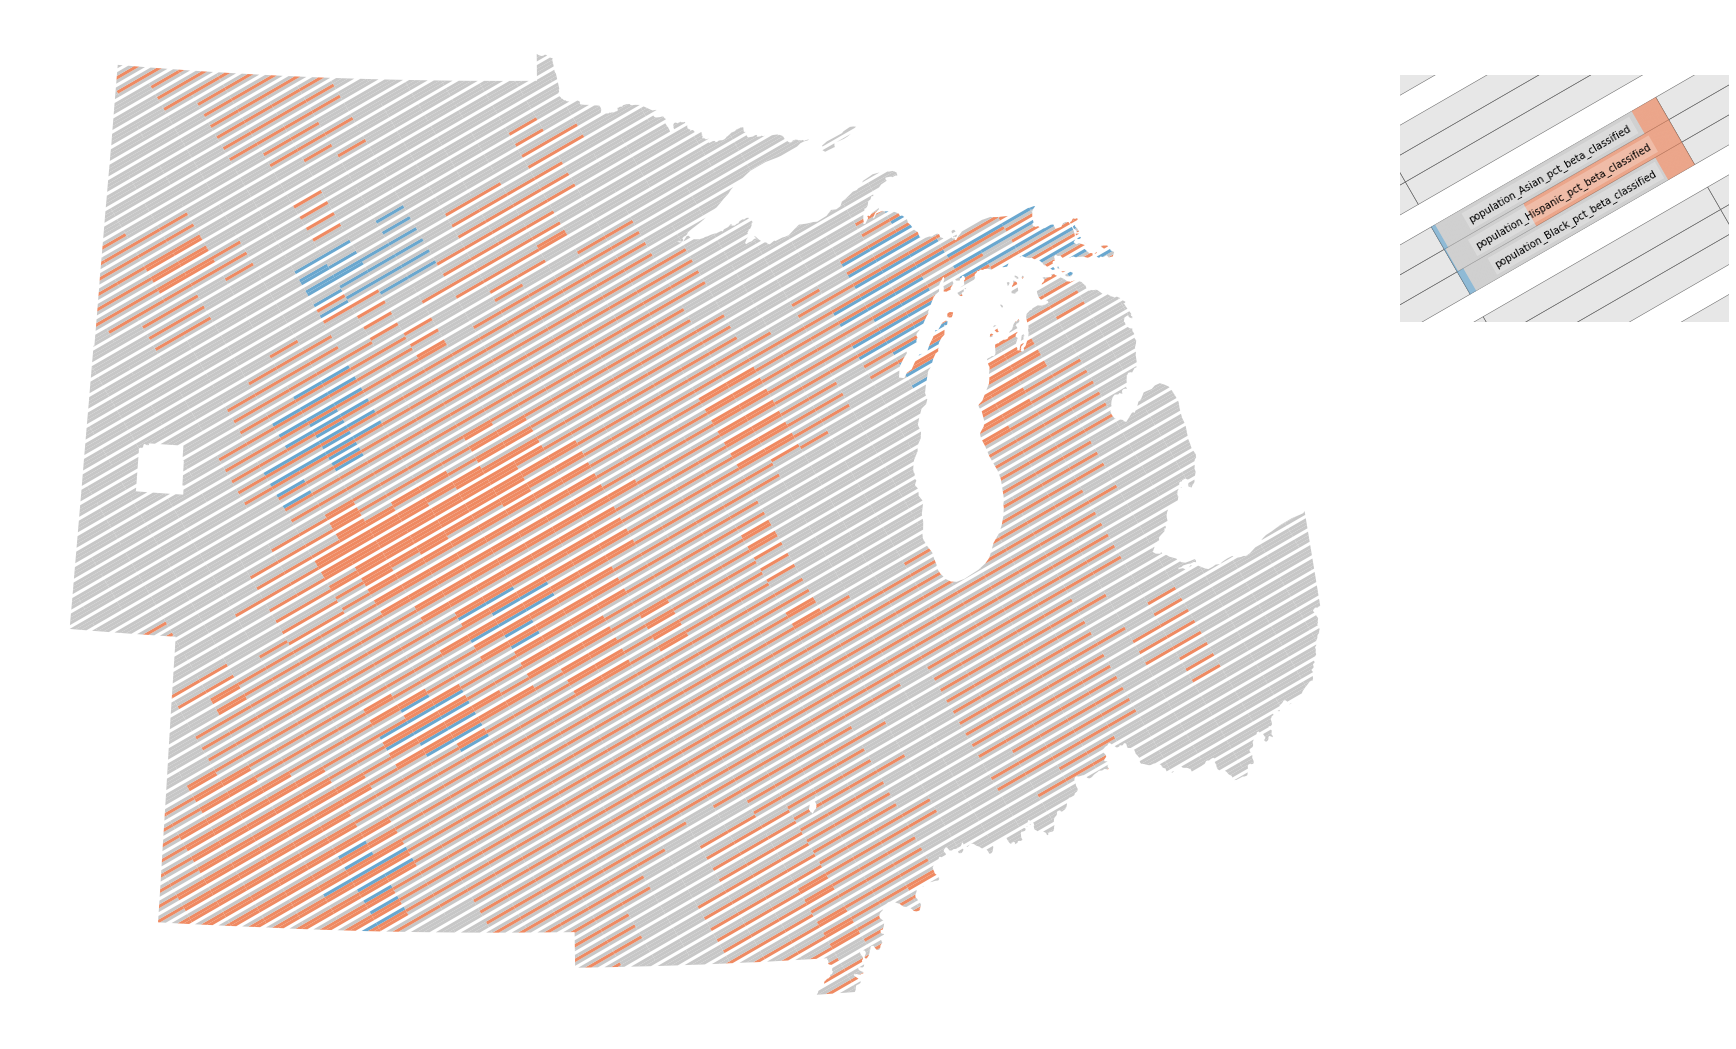

In [10]:
w2_map.variables = {}
for k, v in w1_map.variables.items():
    if v in list(gwr2.columns):
        w2_map.variables[k] = v
w2_map.colourmaps = {}
for var in w2_map.variables.values():
    w2_map.colourmaps[var] = w1_map.colourmaps[var]
w2_map.legend_zoom = 0.8

w2_map.dpi = 150
w2_map.figsize = (24, 18)

fig = w2_map.render(legend_zoom = 0.8)
fig.savefig("weave2.pdf")